In [ ]:
!pip install nltk scikit-learn gensim matplotlib pandas


In [ ]:
texts = [doc.split() for doc in df['cleaned_text']]
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Train LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus, num_topics=2, id2word=dictionary, passes=15)
topics = lda_model.print_topics(num_words=4)
for topic in topics:
    print(topic)


(0, '0.059*"natural" + 0.035*"language" + 0.035*"processing" + 0.035*"involves"')
(1, '0.041*"discovering" + 0.041*"type" + 0.041*"within" + 0.041*"topic"')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Topic 0:
text learning nlp used machine human chatbots use virtual simulate
Topic 1:
text data natural mining machine sentiment various processing language involves


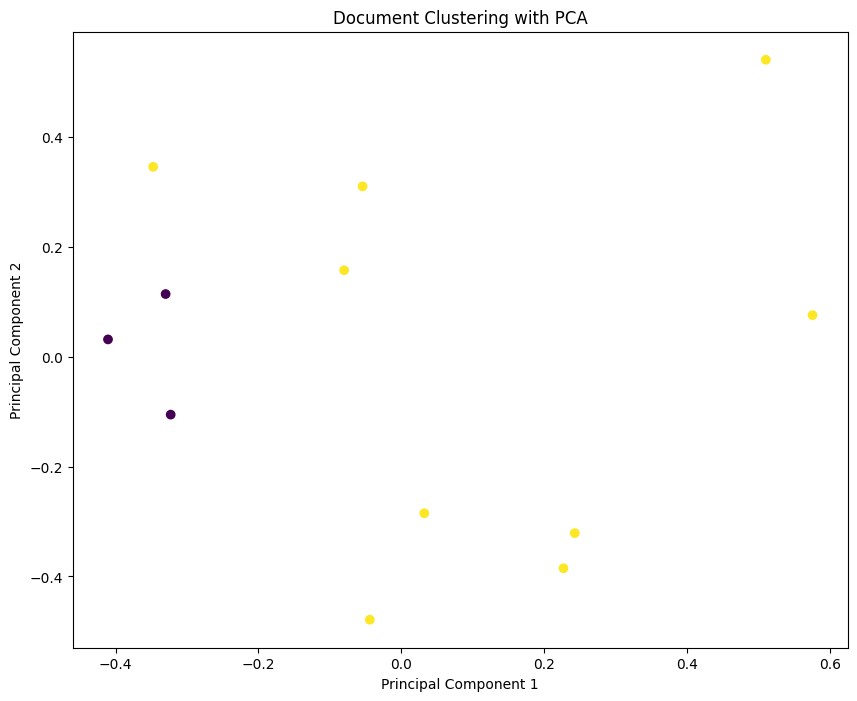

(0, '0.050*"text" + 0.041*"data" + 0.023*"machine" + 0.014*"various"')
(1, '0.056*"text" + 0.023*"mining" + 0.023*"nlp" + 0.023*"natural"')


In [ ]:
import nltk
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, PCA
from sklearn.cluster import KMeans
from gensim import corpora
import gensim
import matplotlib.pyplot as plt

# Download NLTK stop words
nltk.download('stopwords')
from nltk.corpus import stopwords

# Improved set of documents
documents = [
    "Text mining involves the extraction of useful information from text data. It uses various techniques from natural language processing and machine learning.",
    "Topic modeling is a statistical method used to uncover abstract topics that occur in a collection of documents. It helps in identifying patterns in text data.",
    "Document clustering groups a set of documents into clusters based on their content similarity. This is useful for organizing large volumes of text data.",
    "Natural Language Processing (NLP) is a field of artificial intelligence that focuses on the interaction between computers and humans through natural language.",
    "Machine learning enables systems to learn and improve from experience without being explicitly programmed. It's a key component of data mining and text mining.",
    "Deep learning, a subset of machine learning, uses neural networks with many layers to analyze various types of data including text and speech.",
    "Data preprocessing is an essential step in text mining. It involves cleaning and transforming raw text data into a format suitable for analysis.",
    "Sentiment analysis is a technique used in text mining to identify and extract subjective information from text. It helps in understanding the sentiment behind the text.",
    "Named entity recognition (NER) is a process in NLP that identifies and classifies key elements in text into predefined categories such as names, dates, and locations.",
    "Text summarization is a task in NLP that automatically generates a concise and coherent summary of a larger text document.",
    "Spam detection uses machine learning and text mining techniques to identify and filter out unwanted emails or messages.",
    "Chatbots use NLP and machine learning to simulate human conversation. They are used in customer service, virtual assistants, and other applications."
]

# Convert to pandas DataFrame
df = pd.DataFrame(documents, columns=['text'])

stop_words = set(stopwords.words('english'))

def preprocess(text):
    text = text.lower()  # Convert to lowercase
    words = text.split()  # Tokenize
    words = [word for word in words if word.isalpha()]  # Remove punctuation
    words = [word for word in words if word not in stop_words]  # Remove stop words
    return ' '.join(words)

df['cleaned_text'] = df['text'].apply(preprocess)

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['cleaned_text'])

lda = LatentDirichletAllocation(n_components=2, random_state=42)
lda.fit(X)

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
tf_feature_names = vectorizer.get_feature_names_out()
display_topics(lda, tf_feature_names, no_top_words)

# Perform PCA to reduce dimensions
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X.toarray())

# KMeans clustering
num_clusters = 2
km = KMeans(n_clusters=num_clusters, random_state=42)
km.fit(X)

df['cluster'] = km.labels_

# Plotting the clusters with PCA
plt.figure(figsize=(10, 8))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=km.labels_, cmap='viridis')
plt.title('Document Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

texts = [doc.split() for doc in df['cleaned_text']]
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Train LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus, num_topics=2, id2word=dictionary, passes=15)
topics = lda_model.print_topics(num_words=4)
for topic in topics:
    print(topic)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


LDA Topic Modeling using scikit-learn:
Topic 0:
work good great company people benefits employees pay lot life
Topic 1:
good work management great training environment many working time people


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


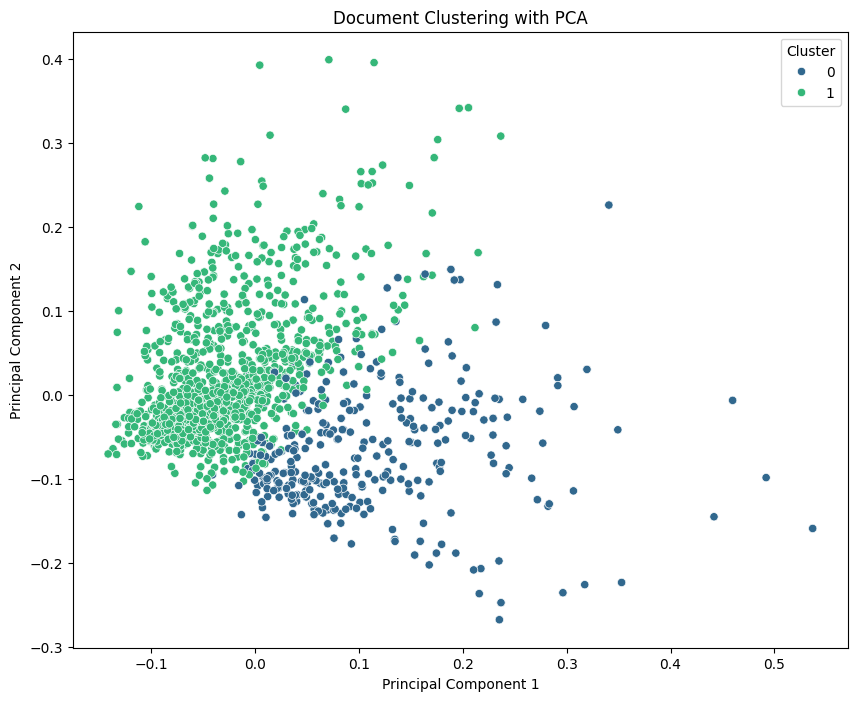

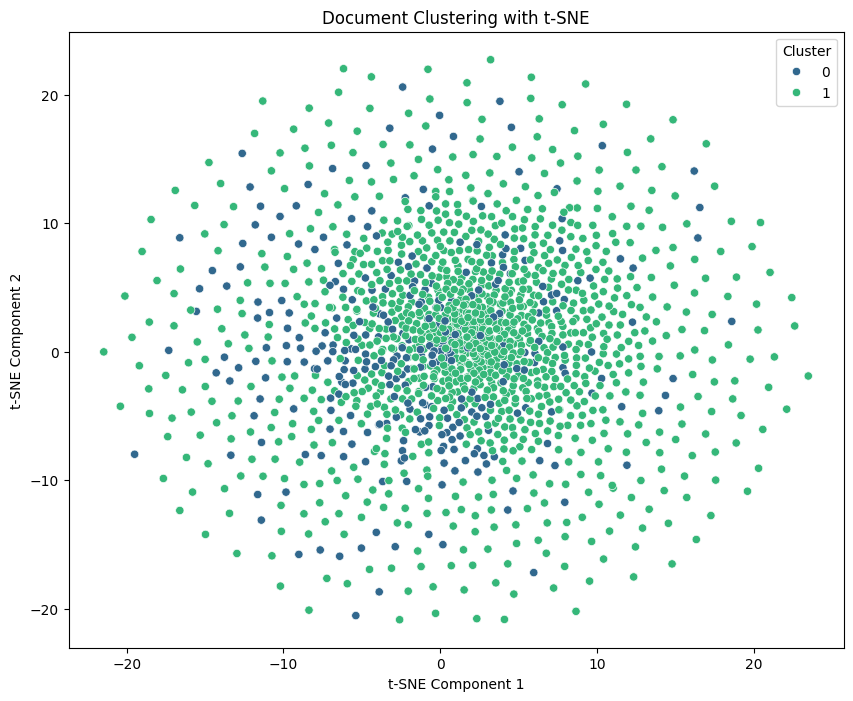

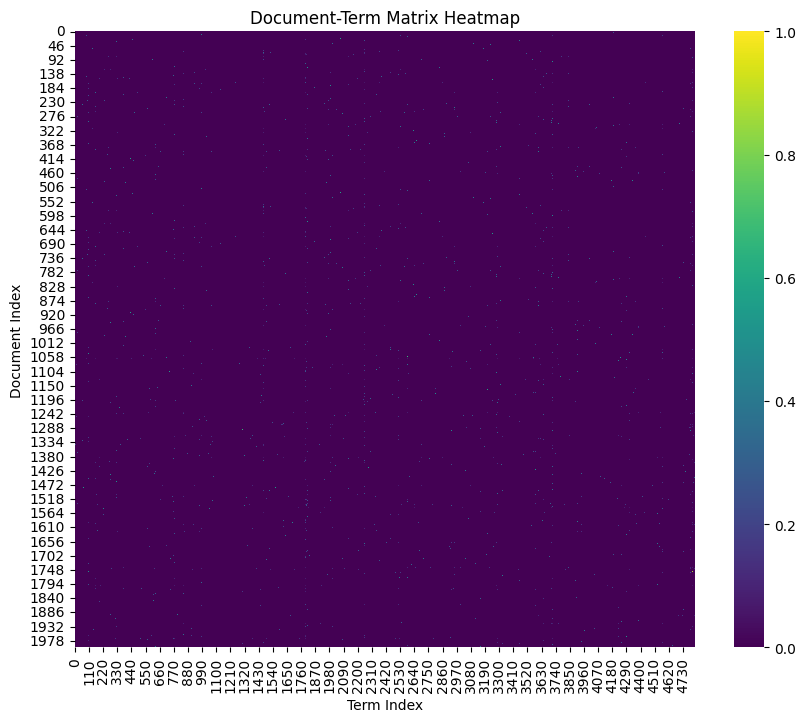

LDA Topic Modeling using Gensim:
(0, '0.028*"work" + 0.020*"good" + 0.014*"company" + 0.010*"people"')
(1, '0.021*"work" + 0.015*"great" + 0.014*"people" + 0.014*"company"')


In [5]:
import nltk
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from gensim import corpora
import gensim
import matplotlib.pyplot as plt
import seaborn as sns


nltk.download('stopwords')
from nltk.corpus import stopwords

file_path = '/content/glassdoortest1.csv'

df = pd.read_csv(file_path, encoding='ISO-8859-1')

if 'pros' not in df.columns or 'cons' not in df.columns:
    raise ValueError("CSV file must contain columns named 'pros' and 'cons'")

df['text'] = df['pros'] + " " + df['cons']

stop_words = set(stopwords.words('english'))

def preprocess(text):
    text = text.lower()  # Convert to lowercase
    words = text.split()  # Tokenize
    words = [word for word in words if word.isalpha()]  # Remove punctuation
    words = [word for word in words if word not in stop_words]  # Remove stop words
    return ' '.join(words)

df['cleaned_text'] = df['text'].apply(preprocess)

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['cleaned_text'])

lda = LatentDirichletAllocation(n_components=2, random_state=42)
lda.fit(X)

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
tf_feature_names = vectorizer.get_feature_names_out()
print("LDA Topic Modeling using scikit-learn:")
display_topics(lda, tf_feature_names, no_top_words)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X.toarray())

num_clusters = 2
km = KMeans(n_clusters=num_clusters, random_state=42)
km.fit(X)

df['cluster'] = km.labels_

plt.figure(figsize=(10, 8))
sns.scatterplot(x=principal_components[:, 0], y=principal_components[:, 1], hue=df['cluster'], palette='viridis')
plt.title('Document Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

tsne = TSNE(n_components=2, random_state=42)
tsne_components = tsne.fit_transform(X.toarray())

plt.figure(figsize=(10, 8))
sns.scatterplot(x=tsne_components[:, 0], y=tsne_components[:, 1], hue=df['cluster'], palette='viridis')
plt.title('Document Clustering with t-SNE')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Cluster')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(X.toarray(), cmap='viridis')
plt.title('Document-Term Matrix Heatmap')
plt.xlabel('Term Index')
plt.ylabel('Document Index')
plt.show()

texts = [doc.split() for doc in df['cleaned_text']]
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

lda_model = gensim.models.ldamodel.LdaModel(corpus, num_topics=2, id2word=dictionary, passes=15)
print("LDA Topic Modeling using Gensim:")
topics = lda_model.print_topics(num_words=4)
for topic in topics:
    print(topic)


In [8]:
!pip install nltk scikit-learn gensim matplotlib pandas
!pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 11.8 MB/s eta 0:00:00


In [10]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from gensim import corpora, models
import gensim
import nltk
nltk.download('stopwords')
import pyLDAvis # Import the main pyLDAvis module
import pyLDAvis.gensim_models as gensimvis # Import the submodule for Gensim

# Load data from CSV
file_path = '/content/glassdoortest1.csv'  # Path to the uploaded CSV file
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Ensure the columns with text data are named 'pros' and 'cons'
if 'pros' not in df.columns or 'cons' not in df.columns:
    raise ValueError("CSV file must contain columns named 'pros' and 'cons'")

# Combine 'pros' and 'cons' into a single column for analysis
df['text'] = df['pros'] + " " + df['cons']

# Tokenize words and preprocess
tokenizer = RegexpTokenizer(r'\w+')
df['tokens'] = df['text'].apply(lambda x: tokenizer.tokenize(x.lower()))

# Remove stop words
stop_words = set(stopwords.words('english'))
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

# Create Dictionary
dictionary = corpora.Dictionary(df['tokens'])

# Create Corpus
corpus = [dictionary.doc2bow(text) for text in df['tokens']]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=2,
                                           random_state=42,
                                           passes=15,
                                           per_word_topics=True)

# Print the topics
print("LDA Topics:")
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx}: {topic}")

# Visualize topics
pyLDAvis.enable_notebook() # Now you can use pyLDAvis directly
vis = gensimvis.prepare(lda_model, corpus, dictionary)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


LDA Topics:
Topic 0: 0.028*"work" + 0.017*"company" + 0.017*"great" + 0.014*"good" + 0.013*"people" + 0.012*"benefits" + 0.009*"pay" + 0.008*"management" + 0.008*"life" + 0.007*"balance"
Topic 1: 0.020*"work" + 0.013*"good" + 0.012*"employees" + 0.012*"company" + 0.012*"management" + 0.012*"people" + 0.009*"benefits" + 0.008*"honeywell" + 0.007*"many" + 0.006*"great"


PreparedData(topic_coordinates=             x    y  topics  cluster       Freq
topic                                          
1      0.05052  0.0       1        1  55.830646
0     -0.05052  0.0       2        1  44.169354, topic_info=            Term         Freq        Total Category  logprob  loglift
69          life   190.000000   190.000000  Default  30.0000  30.0000
52       balance   164.000000   164.000000  Default  29.0000  29.0000
4          great   565.000000   565.000000  Default  28.0000  28.0000
87          work  1222.000000  1222.000000  Default  27.0000  27.0000
347        years   202.000000   202.000000  Default  26.0000  26.0000
..           ...          ...          ...      ...      ...      ...
151          job   103.095605   240.919741   Topic2  -5.3963  -0.0317
238    employees   141.382857   499.589526   Topic2  -5.0804  -0.4452
153        place    75.265504   175.036499   Topic2  -5.7109  -0.0268
38   environment    82.782246   237.026986   Topic2  -5.6157  -0.2348
95          year    69.119150   193.550471   Topic2  -5.7961  -0.2126

[185 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
331       1  0.891321       10
331       2  0.114272       10
877       1  0.756522        2
877       2  0.244757        2
921       1  0.819865        3
...     ...       ...      ...
32        2  0.329922  working
95        1  0.640660     year
95        2  0.356496     year
347       1  0.879544    years
347       2  0.118590    years

[252 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1])